In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [4]:
from sklearn.datasets import fetch_lfw_people 
data_home = 'Bureau/All_Machine_Learning_courses/All_Exercices_ML/Exercices_SVM/' # the actual path on your computer where you want to store the dataset
faces = fetch_lfw_people(min_faces_per_person=60,data_home=data_home, download_if_missing=True)
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [5]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [11]:
#the different categories in the variable target_names
for key, value in faces.items():
    if key=='target_names':
        print(key, value)

target_names ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [14]:
#the shape of the variable images
for key, value in faces.items():
     if key=='images':
            print(value.shape)
#the first dimension represents the numberof images, 
#the second and third respectively represent the width and height of the images in the dataset.            

(1348, 62, 47)


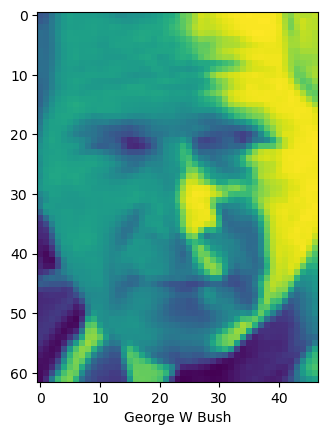

In [20]:
#displaying the 8th image in the dataset. 
plt.imshow(faces.images[7])
plt.xlabel(faces.target_names[faces.target[7]]);


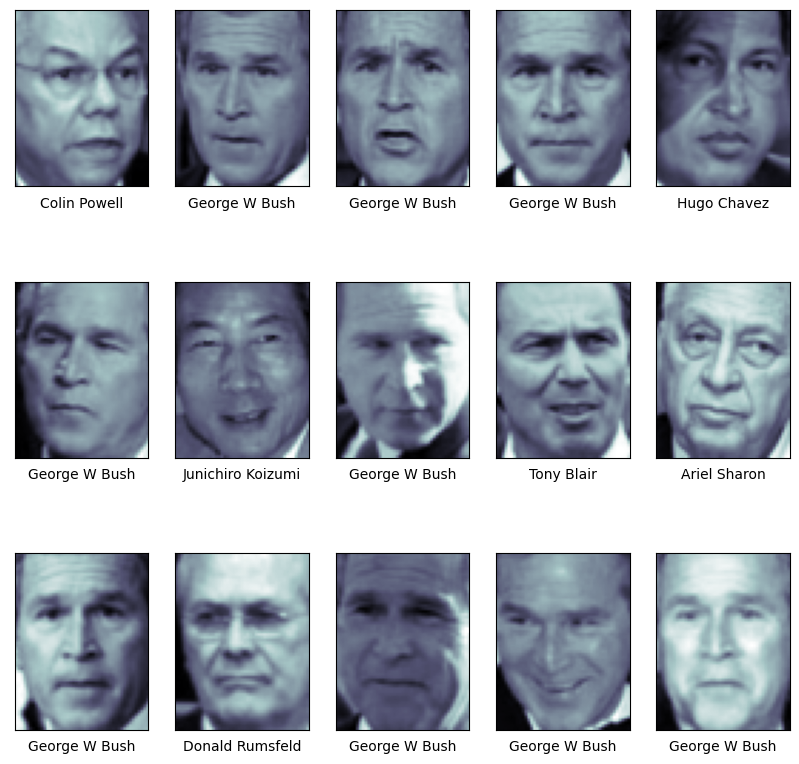

In [27]:
fig, ax = plt.subplots(3, 5, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])
#fig: This variable represents the figure object, which is the top-level container for all the elements 
#(axes, images, labels, etc.) of the plot.
#ax: This variable is a 2D NumPy array containing all the individual subplots (axes) within the figure. In this case, 
#it's a 3x5 grid of subplots because you specified plt.subplots(3, 5). Each element of ax corresponds to one of the subplots, 
#and you can access and modify each subplot individually through this array    

 Choosing the appropriate kernel for a Support Vector Machine (SVM) depends on the characteristics of your data and the problem you are trying to solve. The choice of kernel is a critical decision in SVM, as it defines how data points are transformed into a higher-dimensional space to make them separable. The most common kernel functions used in SVM are the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel. Here are some guidelines to help you decide which kernel to use:

Linear Kernel:

Use when your data is linearly separable or nearly linearly separable. This kernel is a good choice when you believe there is a linear decision boundary in your data.
It's computationally efficient and often a good starting point for SVM.
Polynomial Kernel:

Use when your data has some degree of non-linearity but can still be approximated by a polynomial function.
You need to specify the degree of the polynomial as a hyperparameter. Higher-degree polynomials can capture more complex patterns in the data but can also lead to overfitting.
Radial Basis Function (RBF) Kernel:

The RBF kernel is very versatile and is suitable for most cases. It's the default choice for many SVM implementations.
Use when you have no prior knowledge about the data's distribution or when you suspect that there is a non-linear decision boundary.
The RBF kernel has two hyperparameters: C and gamma. Tuning these hyperparameters is essential to achieve good performance.
Sigmoid Kernel:

Use when you believe your data follows a sigmoidal (S-shaped) distribution, or when you need a kernel that can handle any non-linear decision boundary.
The sigmoid kernel also has two hyperparameters: C and gamma.
To determine the best kernel for your specific problem, you should perform cross-validation and hyperparameter tuning. This involves trying different kernel functions and setting appropriate hyperparameters for each kernel. Use techniques like grid search or random search to find the combination of kernel and hyperparameters that result in the best model performance on a validation dataset.

In [28]:
svm = SVC(kernel='rbf', class_weight='balanced')
X_train, X_test, Y_train, Y_test = train_test_split(faces.data, faces.target, test_size = 0.3, random_state=0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)


0.7555555555555555

The 'balanced' option for the class_weight parameter automatically adjusts the weights of the classes inversely proportional to their frequencies. This means that classes with fewer samples will have higher weights, while classes with more samples will have lower weights.

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

gridsearch = GridSearchCV(svm, param_grid, verbose=2, n_jobs=-1)
gridsearch

GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In this example, n_jobs=-1 indicates that the grid search should use all available CPU cores for parallel computation. This can speed up the hyperparameter search process, especially for large datasets and complex models. However, you should be aware of the resource limitations of your machine and choose an appropriate value for n_jobs based on your system's capabilities.

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters:  {'C': 10, 'gamma': 0.0001}
Best score on test set:  0.8296296296296296


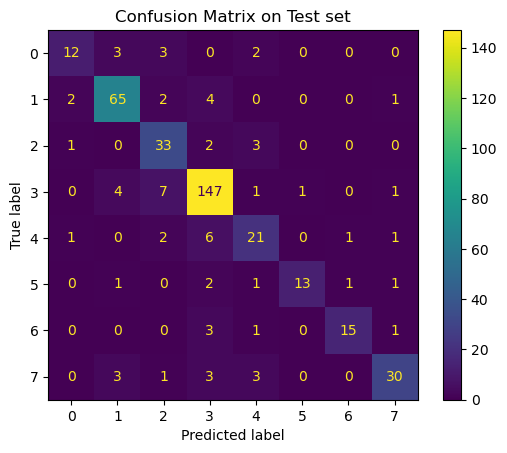

In [33]:
gridsearch.fit(X_train, Y_train)
print("Best hyperparameters: ", gridsearch.best_params_)
print("Best score on test set: ", gridsearch.score(X_test, Y_test))
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
Y_test_pred = gridsearch.predict(X_test)
print(classification_report(Y_test,Y_test_pred, target_names= faces.target_names))